### Gradient Boosting Regressor


In [11]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("../..")
from utils.StockPricesProcess import load_prices_df, add_lags

# defining the path to the stock prices data and the date range
df_path = "../../data/stock_prices/yfinance/AAPL_prices.csv"
start_date_string = "2022-01-01"
end_date_string = "2023-01-01"

# Load stock prices and add lags using functions from StockPricesProcess.py
stock_data = load_prices_df(path=df_path, start_date_string=start_date_string, end_date_string=end_date_string)
stock_data = add_lags(stock_data=stock_data.copy(), numLags=3)
print(stock_data.shape)

stock_data.head(2)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(251, 8)


,Open,High,Low,Close,Volume,Close_Lag1,Close_Lag2,Close_Lag3
Date,,,,,,,,
2022-01-03 05:00:00+00:00,175.597058,180.583650,175.478569,179.724564,104487900,179.724564,179.724564,179.724564
2022-01-04 05:00:00+00:00,180.336790,180.642895,176.870854,177.443573,99310400,179.724564,179.724564,179.724564


Visualize the adjusted close prices over time using a line plot.

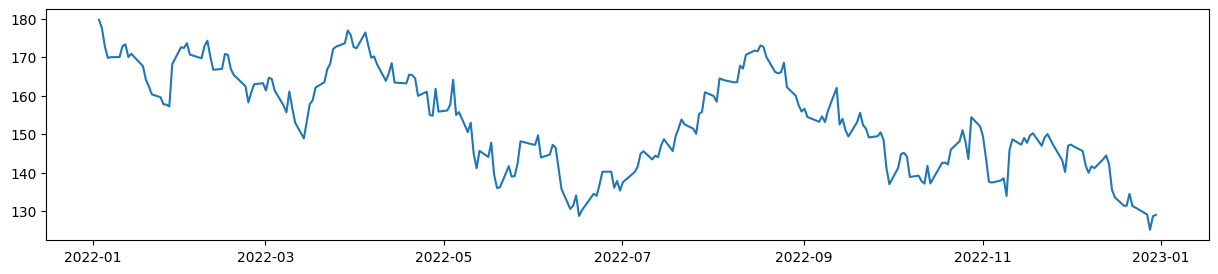

In [12]:
plt.figure(figsize=(15, 3))
plt.plot(stock_data.index, stock_data['Close'],)

Convert the 'Date' column to a datetime format using the specified format ("%d/%m/%Y"). Sort the dataset based on the 'Date' column to ensure it's in chronological order.


- The target variable (output_var) is set to the "Adjusted_close" column from the AAPL dataset. This is the variable we aim to predict.

- The features variable (features) is a list of columns that will be used as input features for training the model. These features include "Close," "Open," "High," "Low," and "Volume."

In [13]:
features = ["Close_Lag1", "Close_Lag2", "Close_Lag3", "Volume"]
output_var = stock_data["Close"]

The fit_transform method of the scaler is applied to the selected features (aapl_data[features]). This scales and transforms the features to be within the specified range.

In [14]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(stock_data[features])

In [15]:
from sklearn.model_selection import TimeSeriesSplit


timesplit = TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
    X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
    y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()


In [16]:
from sklearn.ensemble import GradientBoostingRegressor 

gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)  
gb_regressor.fit(X_train, y_train)  

GradientBoostingRegressor(random_state=42)

In [17]:
y_pred_gb = gb_regressor.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print the metrics
print(f'Mean Absolute Error (MAE) - Gradient Boosting: {mae_gb}')
print(f'Mean Squared Error (MSE) - Gradient Boosting: {mse_gb}')
print(f'Root Mean Squared Error (RMSE) - Gradient Boosting: {rmse_gb}')
print(f'R-squared (R2) Score - Gradient Boosting: {r2_gb}')

Mean Absolute Error (MAE) - Gradient Boosting: 3.4837431440102375
Mean Squared Error (MSE) - Gradient Boosting: 18.46279974012748
Root Mean Squared Error (RMSE) - Gradient Boosting: 4.296836015037981
R-squared (R2) Score - Gradient Boosting: 0.615165977338463


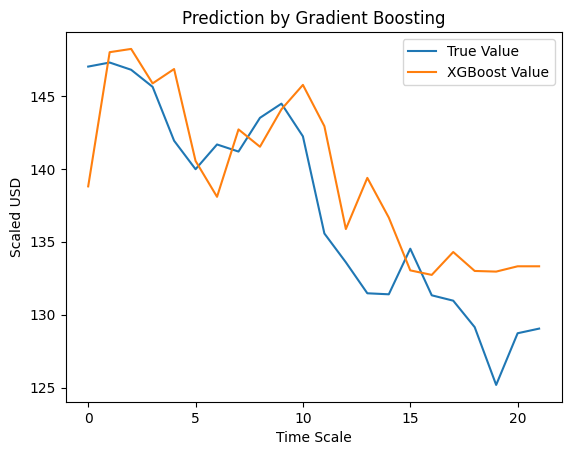

In [19]:
plt.plot(y_test, label="True Value")
plt.plot(y_pred_gb, label="XGBoost Value")
plt.title("Prediction by Gradient Boosting")
plt.xlabel("Time Scale")
plt.ylabel("Scaled USD")
plt.legend()
plt.show()

In [20]:
import xgboost as xgb

xgb_regressor = xgb.XGBRegressor( n_estimators=100, random_state=42)

xgb_regressor.fit(X_train, y_train)  # Fit the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [21]:
y_pred_xgb = xgb_regressor.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_gb = mean_absolute_error(y_test, y_pred_xgb)
mse_gb = mean_squared_error(y_test, y_pred_xgb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_xgb)

# Print the metrics
print(f'Mean Absolute Error (MAE) - Gradient Boosting: {mae_gb}')
print(f'Mean Squared Error (MSE) - Gradient Boosting: {mse_gb}')
print(f'Root Mean Squared Error (RMSE) - Gradient Boosting: {rmse_gb}')
print(f'R-squared (R2) Score - Gradient Boosting: {r2_gb}')

Mean Absolute Error (MAE) - Gradient Boosting: 3.31915283203125
Mean Squared Error (MSE) - Gradient Boosting: 17.52158925961703
Root Mean Squared Error (RMSE) - Gradient Boosting: 4.185879747390867
R-squared (R2) Score - Gradient Boosting: 0.6347843353602315


### GradientBoostingRegressor References

- [Scikit-learn GradientBoostingRegressor Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)

- [Imputation in scikit-learn](https://scikit-learn.org/stable/modules/impute.html)
